<a href="https://colab.research.google.com/github/Lu1sV1rus/Investigacion-de-Operaciones-/blob/main/PERT_CPM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Caso 9.1 DINERO EN MOVIMIENTO

-----

Jake no prestó atención a los rumores que advertían sobre un colapso japonés.

En su lugar, incrementó de manera considerable la inversión que Grant Hill Associates mantenía en el mercado de Japón. Debido a que ese mercado había tenido mejor desempeño que el esperado durante el año anterior, el mes
pasado Jake había aumentado la inversión de 2.5 a 15 millones
de dólares en él.

En ese momento, el dólar valía 80 yenes.

Formular un plan para mover las inversiones fuera de Japón, Indonesia y Malasia.

Los banqueros socios de Grant Hill Associates cargan diferentes comisiones por transacciones para convertir el dinero en otra divisa y por enviar cantidades
grandes de efectivo alrededor del mundo.

Y ahora, para empeorar las cosas, los gobiernos del oriente asiático han impuesto limitaciones muy estrictas sobre la cantidad de dinero que un individuo o compañía puede cambiar de su moneda a otra moneda extranjera y retirarla del país.

Como el dinero en efectivo de Grant Hill Associates llega a 10 500 millones de rupias indonesias y 28 millones de ringgits de Malasia, junto con las inversiones en yenes, no está claro cómo debe convertir este dinero a dólares.

Jake desea encontrar el método más eficiente para convertir estas inversiones a dólares a un mínimo costo.

En la página de internet de su compañía siempre puede encontrar las tasas
de cambio actualizadas al minuto de la mayoría de las monedas del mundo (tabla 1).

La tabla establece, por ejemplo, que 1 yen japonés es igual
a 0.008 dólares.

Con unas cuantas llamadas telefónicas obtiene los costos de transacción que debe pagar su compañía por transacciones grandes en estos tiempos críticos (tabla 2).

Jake observa que el cambio de una divisa a otra implica
el mismo costo por transacción que la conversión inversa.

Por ultimo, Jake encuentra las cantidades máximas de divisas de cada país que su compañía puede convertir en otras divisas en Japón, Indonesia y Malasia (tabla 3).

---

<p>Cazares Hernádez Luis Angel </p>
<p>Sánchez González Josue</p>

---

Importamos las dependencias
<p><font color="skyblue"> Pandas para las cadenas de datos (dataframes)</p>
<p><font color="tomato"> Networkx para las redes (graficarlas)</p>
<p><font color="lightgreen"> Pulp para la solucion del problema
<p><font color="pink"> Matplot para mejorar las graficas </p>
<p><font color="lavanda"> display para ver los dataframes</p>

In [156]:
#!pip -q install pulp networkx
import pandas as pd
import networkx as nx
import pulp as pl
import matplotlib.pyplot as plt
pd.set_option('display.float_format', '{:.5f}'.format)

Como primer paso creamos la lista de divisas
<p><font color="skyblue"> currencies = [] una cadena de datos </p>

Y creamos una otra cadena, pero en este caso con 2 variables
<p><font color="lavanda"> El nombre de la moneda 'Yen' </p>
<p><font color="pink"> Y la cantidad 15000000*80</p>


In [157]:
# Lista de todas las divisas involucradas en el problema.
currencies = ['Yen', 'Rupia', 'Ringgit', 'USD', 'CAD', 'Euro', 'Libra', 'Peso']

# Tenencias iniciales de cada divisa.
initial_holdings_dict = {
    'Yen': 15000000 * 80,
    'Rupia': 10500000000,
    'Ringgit': 28000000,
    'USD': 0,
    'CAD': 0,
    'Euro': 0,
    'Libra': 0,
    'Peso': 0
}
#Mostramos las listas
#usamos print y display por que realizan una funcion similar
print(currencies)
display(initial_holdings_dict)

['Yen', 'Rupia', 'Ringgit', 'USD', 'CAD', 'Euro', 'Libra', 'Peso']


{'Yen': 1200000000,
 'Rupia': 10500000000,
 'Ringgit': 28000000,
 'USD': 0,
 'CAD': 0,
 'Euro': 0,
 'Libra': 0,
 'Peso': 0}

Guardamos la primer lista de datos
<p><font color="skyblue"> tazadecambio = {} </p>

como una cadena de datos con 2 variables
<p><font color="lightgreen"> El nombre de la moneda 'Yen' </p>
<p><font color="tomato"> Y la cantidad 50 que equivale a 'Rupia'</p>
<p><font color="pink"> Finalmete guardamos los datos como un data frame en rates (ratio de cambio) </p>

In [158]:
# Tasas de cambio
tazadecambio = {
               #Yen      Rupia      Ringgit   USD      CAD     Euro     Libra    Peso
    'Yen':     [1,       50,        0.04,     0.008,   0.01,   0.0064,  0.0048,  0.0768],
    'Rupia':   [1/50,    1,         0.0008,   0.00016, 0.0002, 0.000128,0.000096,0.001536],
    'Ringgit': [1/0.04,  1/0.0008,  1,        0.2,     0.25,   0.16,    0.12,    1.92],
    'USD':     [1/0.008, 1/0.00016, 1/0.2,    1,       1.25,   0.8,     0.6,     9.6],
    'CAD':     [1/0.01,  1/0.0002,  1/0.25,   1/1.25,  1,      0.64,    0.48,    7.68],
    'Euro':    [1/0.0064,1/0.000128,1/0.16,   1/0.8,   1/0.64, 1,       0.75,    12],
    'Libra':   [1/0.0048,1/0.000096,1/0.12,   1/0.6,   1/0.48, 1/0.75,  1,       16],
    'Peso':    [1/0.0768,1/0.001536,1/1.92,   1/9.6,   1/7.68, 1/12,    1/16,    1]
}
rates = pd.DataFrame(tazadecambio, index=currencies, columns=currencies).to_dict()
#Mostramos los datos como un dataframe con display
display(pd.DataFrame(tazadecambio))

,Yen,Rupia,Ringgit,USD,CAD,Euro,Libra,Peso
0,1.00000,0.02000,25.00000,125.00000,100.00000,156.25000,208.33333,13.02083
1,50.00000,1.00000,1250.00000,6250.00000,5000.00000,7812.50000,10416.66667,651.04167
2,0.04000,0.00080,1.00000,5.00000,4.00000,6.25000,8.33333,0.52083
3,0.00800,0.00016,0.20000,1.00000,0.80000,1.25000,1.66667,0.10417
4,0.01000,0.00020,0.25000,1.25000,1.00000,1.56250,2.08333,0.13021
5,0.00640,0.00013,0.16000,0.80000,0.64000,1.00000,1.33333,0.08333
6,0.00480,0.00010,0.12000,0.60000,0.48000,0.75000,1.00000,0.06250
7,0.07680,0.00154,1.92000,9.60000,7.68000,12.00000,16.00000,1.00000


Guardamos la segunda lista de datos
<p><font color="skyblue"> costosdetrans = {} </p>

como una cadena de datos con 2 variables
<p><font color="lavanda"> El nombre de la moneda 'Yen' </p>
<p><font color="pink"> Y la cantidad 0.4 que cuesta cambiar a 'USD'</p>
<p><font color="lightgreen"> Finalmete guardamos los datos como un data frame cost (costos de transaccion) </p>

In [159]:
# Costos de transacción
costosdetrans = {
               #Yen Rupia Ringgit   USD   CAD   Euro  Libra Peso
    'Yen':     [0,    0.5,  0.5,    0.4,  0.4,  0.4,  0.25, 0.5],
    'Rupia':   [0.5,  0,    0.7,    0.5,  0.3,  0.3,  0.75, 0.75],
    'Ringgit': [0.5,  0.7,  0,      0.7,  0.7,  0.4,  0.45, 0.5],
    'USD':     [0.4,  0.5,  0.7,    0,    0.05, 0.1,  0.1,  0.1],
    'CAD':     [0.4,  0.3,  0.7,    0.05, 0,    0.2,  0.1,  0.1],
    'Euro':    [0.4,  0.3,  0.4,    0.1,  0.2,  0,    0.05, 0.5],
    'Libra':   [0.25, 0.75, 0.45,   0.1,  0.1,  0.05, 0,    0.5],
    'Peso':    [0.5,  0.75, 0.5,    0.1,  0.1,  0.5,  0.5,  0]
}
costs = (pd.DataFrame(costosdetrans, index=currencies, columns=currencies) / 100).to_dict()
#Mostramos los datos como un dataframe con display
display(pd.DataFrame(costosdetrans)/100)

,Yen,Rupia,Ringgit,USD,CAD,Euro,Libra,Peso
0,0.00000,0.00500,0.00500,0.00400,0.00400,0.00400,0.00250,0.00500
1,0.00500,0.00000,0.00700,0.00500,0.00300,0.00300,0.00750,0.00750
2,0.00500,0.00700,0.00000,0.00700,0.00700,0.00400,0.00450,0.00500
3,0.00400,0.00500,0.00700,0.00000,0.00050,0.00100,0.00100,0.00100
4,0.00400,0.00300,0.00700,0.00050,0.00000,0.00200,0.00100,0.00100
5,0.00400,0.00300,0.00400,0.00100,0.00200,0.00000,0.00050,0.00500
6,0.00250,0.00750,0.00450,0.00100,0.00100,0.00050,0.00000,0.00500
7,0.00500,0.00750,0.00500,0.00100,0.00100,0.00500,0.00500,0.00000


Guardamos la tercer lista de datos
<p><font color="skyblue"> limitesdetrans = {} </p>

como una cadena de datos con 2 variables
<p><font color="orange"> El nombre de la moneda 'Yen' </p>
<p><font color="lightgreen"> Y la cantidad 2000 que equivale a 'Euro'</p>
<p><font color="pink"> Finalmete guardamos los datos como un data frame en limits (el limite de transaccion) </p>

In [160]:
# Límites de transacción (en miles de USD)
limitesdetrans = {
               #Yen    Rupia  Ringgit USD    CAD    Euro   Libra  Peso
    'Yen':     [None,  5000,  5000,   2000,  2000,  2000,  2000,  4000],
    'Rupia':   [5000,  None,  2000,   200,   200,   1000,  500,   200],
    'Ringgit': [3000,  4500,  None,   1500,  1500,  2500,  1000,  1000],
    'USD':     [None] * 8, 'CAD': [None] * 8, 'Euro': [None] * 8, 'Libra': [None] * 8, 'Peso': [None] * 8,
}
limits = pd.DataFrame(limitesdetrans, index=currencies, columns=currencies).to_dict()
#Mostramos los datos como un dataframe con display
display(pd.DataFrame(limitesdetrans))

,Yen,Rupia,Ringgit,USD,CAD,Euro,Libra,Peso
0,NaN,5000.00000,3000.00000,None,None,None,None,None
1,5000.00000,NaN,4500.00000,None,None,None,None,None
2,5000.00000,2000.00000,NaN,None,None,None,None,None
3,2000.00000,200.00000,1500.00000,None,None,None,None,None
4,2000.00000,200.00000,1500.00000,None,None,None,None,None
5,2000.00000,1000.00000,2500.00000,None,None,None,None,None
6,2000.00000,500.00000,1000.00000,None,None,None,None,None
7,4000.00000,200.00000,1000.00000,None,None,None,None,None


Creamos la red con Networkx
<p><font color="skyblue"> definimos una funcion def create_network(): </p>

usamos una funcion pq contiene ciclos for, if y else
<p><font color="orange"> añadimos los nodos con G.add_node </p>
<p><font color="lightgreen"> los arcos, que son los datos de</p>
<p><font color="pink"> rates (ratio de cambio)  - (1-cost) (costo de transaccion)</p>
<p><font color="tomato"> Y tambien los limistes de cambio, que son los datos de limits (limite de transaccion), y como queremos USD los transformamos a USD</p>
<p><font color="coffe"> llamamos a la funcion para crear la red G</p>

Nodos: 8
Arcos: 56


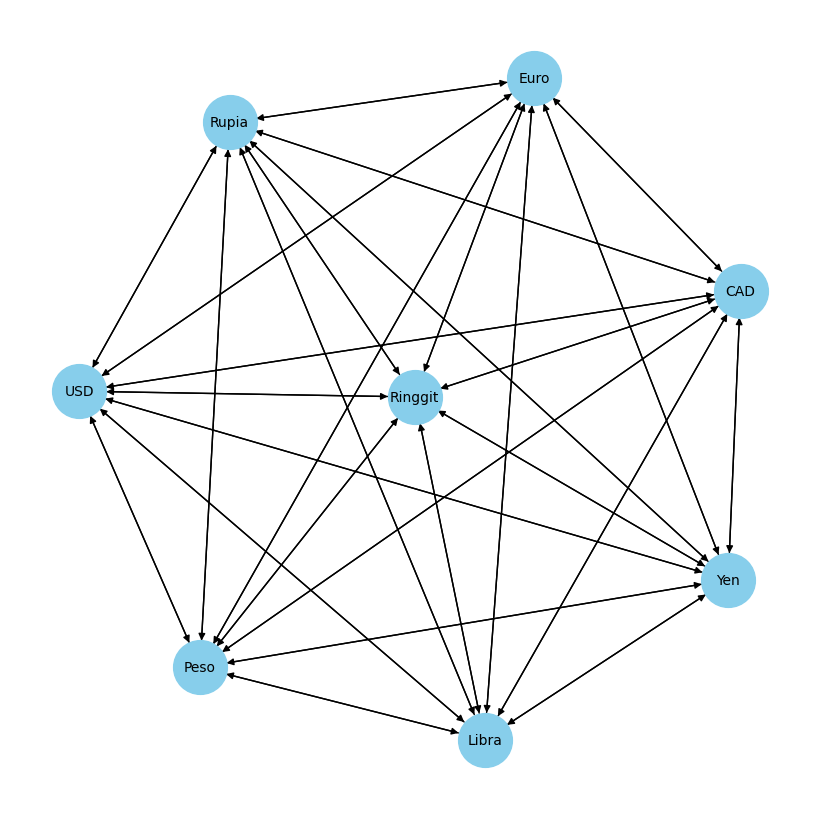

In [162]:
# Red con NetworkX
def create_network():
    G = nx.DiGraph()

    # Agregar nodos (divisas) con su oferta inicial
    for currency in currencies:
        G.add_node(currency, supply=initial_holdings_dict[currency])

    # Agregar arcos (transacciones posibles)
    for i in currencies:
        for j in currencies:
            if i != j:  # No hay transacciones de una divisa a sí misma
                # Calcular tasa neta después de costos
                net_rate = rates[i][j] * (1 - costs[i][j])

                # Calcular capacidad (límite en unidades de la divisa origen)
                if limits[i][j] is not None:
                    # Convertir límite en USD a unidades de la divisa origen
                    # Use a sufficiently large number instead of infinity
                    capacity = limits[i][j] * 1000 / rates[i]['USD'] if rates[i]['USD'] > 0 else 1e12
                else:
                    capacity = 1e12 # Use a sufficiently large number instead of infinity

                G.add_edge(i, j,
                          rate=rates[i][j],
                          cost_rate=costs[i][j],
                          net_rate=net_rate,
                          capacity=capacity,
                          cost_percent=costs[i][j] * 100)

    return G

# llamamos a la funcion para crear la red
G = create_network()

#Usamos plt para que plt nos permita parametros como color del nodo, tamaño del noto, y el tamaño del texto
plt.figure(figsize=(8, 8))

#Dibujamos el nodo con nx
nx.draw(G, with_labels=True, node_color="skyblue", node_size=1500, font_size=10)

#Imprimimos los datos de los nodos y arcos
print(f"Nodos: {len(G.nodes())}")
print(f"Arcos: {len(G.edges())}")

Para ver la informacion de la red
<p><font color="skyblue"> definimos una funcion def info_network(): </p>

usamos una funcion pq contiene ciclos for
<p><font color="tomato"> vemos la informacion de los arcos con data in G.edges</p>
<p><font color="lavanda"> buscamos capacity, e imprimimos la Tasa, Costo, y Limite</p>
<p><font color="pink"> llamamos a la funcion para ver la informacion de la red G</p>

In [ ]:
# Informacion en la red
def info_network(G):
    # Funcion que muestra la información de la red
    for u, v, data in G.edges(data=True):
        if data['capacity'] < float('inf'):  # Mostrar solo arcos menores a inf (infinito)
            print(f"{u} -> {v}: Tasa={data['rate']:.4f}, Costo={data['cost_percent']}%, Límite={data['capacity']:,.0f}")

#Lista de todos los datos presentes en la red
info_network(G)

Yen -> Rupia: Tasa=50.0000, Costo=0.5%, Límite=625,000,000
Yen -> Ringgit: Tasa=0.0400, Costo=0.5%, Límite=625,000,000
Yen -> USD: Tasa=0.0080, Costo=0.4%, Límite=250,000,000
Yen -> CAD: Tasa=0.0100, Costo=0.4%, Límite=250,000,000
Yen -> Euro: Tasa=0.0064, Costo=0.4%, Límite=250,000,000
Yen -> Libra: Tasa=0.0048, Costo=0.25%, Límite=250,000,000
Yen -> Peso: Tasa=0.0768, Costo=0.5%, Límite=500,000,000
Rupia -> Yen: Tasa=0.0200, Costo=0.5%, Límite=31,250,000,000
Rupia -> Ringgit: Tasa=0.0008, Costo=0.7%, Límite=12,500,000,000
Rupia -> USD: Tasa=0.0002, Costo=0.5%, Límite=1,250,000,000
Rupia -> CAD: Tasa=0.0002, Costo=0.3%, Límite=1,250,000,000
Rupia -> Euro: Tasa=0.0001, Costo=0.3%, Límite=6,250,000,000
Rupia -> Libra: Tasa=0.0001, Costo=0.75%, Límite=3,125,000,000
Rupia -> Peso: Tasa=0.0015, Costo=0.75%, Límite=1,250,000,000
Ringgit -> Yen: Tasa=25.0000, Costo=0.5%, Límite=15,000,000
Ringgit -> Rupia: Tasa=1250.0000, Costo=0.7%, Límite=22,500,000
Ringgit -> USD: Tasa=0.2000, Costo=0.7%,

Finalmente para resolver el problema coomo una Optimizacion de red
<p><font color="skyblue"> usamos a la funcion pulp </p>

Creamos un modelos que maximice (pl.LpMaximize)
<p><font color="lime"> le decimos que use la informacion en los arcos G.edges()</p>
<p><font color="lavanda"> pl.LpVariable = capacity (Tasa, Costo, y Limite)</p>

Dado que nuestro objetivo es maximizar los USD
<p><font color="pink"> sumamos lo que entra al total(dentro del ratio de cambio de las divisas) final_usd +=</p>
<p><font color="orange"> restamos lo que sale del total final_usd -=</p>

Dado que queremos maximizar esta entrada de USD
<p><font color="tomato"> igualamos esta variable al modelo model += final_usd,</p>
<p><font color="lightgreen"> restamo lo que sale del total final_usd -=</p>


In [ ]:
# Creamos un modelo que resuelva el problema
model = pl.LpProblem("Optimizacion_Red_Divisas", pl.LpMaximize)

# Usamos la informacion que guardamos en los nodos
x = {}
for u, v in G.edges():
    x[(u, v)] = pl.LpVariable(f"x_{u}_{v}", lowBound=0, upBound=G[u][v]['capacity'])

# Función Objetivo es maximizar los USD al final
# USD final = USD inicial + entradas a USD - salidas de USD
final_usd = initial_holdings_dict['USD']
for u, v in G.edges():
    if v == 'USD':  # Entradas a USD
        final_usd += x[(u, v)] * G[u][v]['net_rate']
    if u == 'USD':  # Salidas de USD
        final_usd -= x[(u, v)]

model += final_usd, "Maximizar_USD_Finales"

# Restricciones de conservación de flujo para cada divisa (excepto USD)
for k in currencies:
    if k != 'USD':
        # Flujo entrante
        inflow = pl.lpSum(x[(i, k)] * G[i][k]['net_rate'] for i in G.predecessors(k))
        # Flujo saliente
        outflow = pl.lpSum(x[(k, j)] for j in G.successors(k))
        # Restricción: lo que sale no puede exceder lo que entra más la oferta inicial
        model += outflow <= initial_holdings_dict[k] + inflow, f"Balance_Flujo_{k}"

In [ ]:
# Resolvemos el problema llamando a la funcion
model.solve()
print(f"USD máximo obtenido: ${pl.value(final_usd):,.2f}")

USD máximo obtenido: $16,796,669.90


Una vez resuelto el problema imprimimos la lista de transacciones
<p><font color="skyblue"> usamos a la funcion var in x.items() </p>

las varibles que presenten un cambio en sus valores >0
<p><font color="lime"> vamos guardando la informacion</p>
<p><font color="lavanda"> amount_from (de donde sale la transacion)</p>
<p><font color="tomato"> amount_to (a que divisa se cambia)</p>

Guardamos estas transacciones en transactions
<p><font color="pink"> Finalmente imprimimos esta lista de transacciones</p>

In [ ]:
# Mostrar transacciones óptimas
print("Lista de Transacciones")
transactions = []
total = 0

for (u, v), var in x.items():
    if pl.value(var) > 0:
        amount_from = pl.value(var)
        amount_to = amount_from * G[u][v]['net_rate']
        transactions.append((u, v, amount_from, amount_to))
        total += amount_from

for u, v, amount_from, amount_to in transactions:
    print(f"{u:8} -> {v:8} : {amount_from:12,.0f} -> {amount_to:12,.0f}")


#Imprimimos el numero total de transacciones y "activos"
print(f"\nVolumen total de transacciones: {total:,.0f} unidades")
print(f"Número de transacciones: {len(transactions)}")

Lista de Transacciones
Yen      -> USD      :  250,000,000 ->    1,992,000
Yen      -> CAD      :  250,000,000 ->    2,490,000
Yen      -> Euro     :  250,000,000 ->    1,593,600
Yen      -> Libra    :  250,000,000 ->    1,197,000
Yen      -> Peso     :  200,000,000 ->   15,283,200
Rupia    -> USD      : 1,250,000,000 ->      199,000
Rupia    -> CAD      : 1,250,000,000 ->      249,250
Rupia    -> Euro     : 6,250,000,000 ->      797,600
Rupia    -> Libra    : 1,750,000,000 ->      166,740
Ringgit  -> USD      :    5,500,000 ->    1,092,300
Ringgit  -> Euro     :   12,500,000 ->    1,992,000
Ringgit  -> Libra    :    5,000,000 ->      597,300
Ringgit  -> Peso     :    5,000,000 ->    9,552,000
CAD      -> USD      :    2,739,250 ->    2,190,304
Euro     -> USD      :    4,383,200 ->    5,473,521
Libra    -> USD      :    1,961,040 ->    3,265,132
Peso     -> USD      :   24,835,200 ->    2,584,413

Volumen total de transacciones: 11,761,918,690 unidades
Número de transacciones: 17


Finalmente imprimimos la lista de Transacciones como una red
<p><font color="skyblue"> Guardamos las transacciones realizadas en una lista transacciones = []</p>

Creamos un grafo dirigido nx.DiGrapg()
<p><font color="lightgreen"> añadimos los arcos de la lista transacciones D.add_edges_from()</p>
<p><font color="lavanda"> usamos plt para un mejor diseño</p>
<p><font color="tomato"> nx.draw para dibujar la red de transacciones</p>


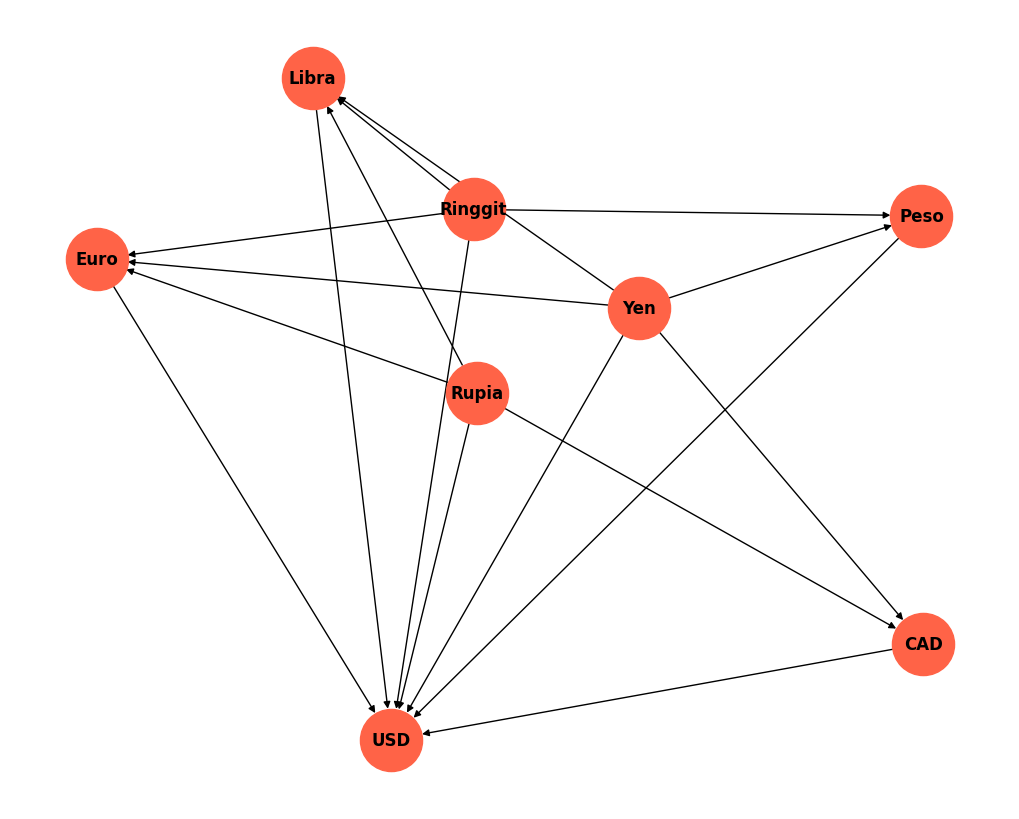

In [ ]:
# Red de las transacciones
transacciones = [
    ('Rupia', 'Euro'), ('Rupia', 'Libra'), ('Rupia', 'USD'), ('Rupia', 'CAD'),
    ('Yen', 'USD'),    ('Yen', 'CAD'),     ('Yen', 'Euro'),  ('Yen', 'Libra'), ('Yen', 'Peso'),
    ('Ringgit', 'Euro'),('Ringgit', 'USD'),('Ringgit', 'Libra'),('Ringgit', 'Peso'),
    ('Peso', 'USD'),   ('Euro', 'USD'),    ('CAD', 'USD'),   ('Libra', 'USD')]

# Crear el grafo
D = nx.DiGraph()

D.add_edges_from(transacciones)

plt.figure(figsize=(10, 8))


nx.draw(D, with_labels=True, node_size=2000, node_color='tomato',
        arrows=True, font_size=12, font_weight='bold')

Creamos la red con Networkx
<p><font color="skyblue"> el cambio con respecto a la anterior es </p>

que modificamos el limite de transaccion de todos por 1e15
<p><font color="orange"> cap = 1e15 </p>

<p><font color="coffe"> llamamos a la funcion para crear la red G2</p>

In [ ]:
# (c) Red de Transacciones Óptimas a USD (sin límites)
def no_limits():
    G = nx.DiGraph()
    for currency in currencies:
        G.add_node(currency, supply=initial_holdings_dict[currency])
    cap = 1e15
    for i in currencies:
        for j in currencies:
            if i == j:
                continue
            net_rate = rates[i][j] * (1 - costs[i][j])
            G.add_edge(i, j,
                       rate=rates[i][j],
                       cost_rate=costs[i][j],
                       net_rate=net_rate,
                       capacity=cap,
                       cost_percent=costs[i][j] * 100)
    return G

G2 = no_limits()


#plt.figure(figsize=(8, 8))
#nx.draw(G, node_color="skyblue", with_labels=True, node_size=1200, font_size=9, arrows=True)

Para ver la informacion de la red
<p><font color="skyblue"> llamamos a la funcion info_network(): </p>

In [ ]:
info_network(G2)

Yen -> Rupia: Tasa=50.0000, Costo=0.5%, Límite=1,000,000,000,000,000
Yen -> Ringgit: Tasa=0.0400, Costo=0.5%, Límite=1,000,000,000,000,000
Yen -> USD: Tasa=0.0080, Costo=0.4%, Límite=1,000,000,000,000,000
Yen -> CAD: Tasa=0.0100, Costo=0.4%, Límite=1,000,000,000,000,000
Yen -> Euro: Tasa=0.0064, Costo=0.4%, Límite=1,000,000,000,000,000
Yen -> Libra: Tasa=0.0048, Costo=0.25%, Límite=1,000,000,000,000,000
Yen -> Peso: Tasa=0.0768, Costo=0.5%, Límite=1,000,000,000,000,000
Rupia -> Yen: Tasa=0.0200, Costo=0.5%, Límite=1,000,000,000,000,000
Rupia -> Ringgit: Tasa=0.0008, Costo=0.7%, Límite=1,000,000,000,000,000
Rupia -> USD: Tasa=0.0002, Costo=0.5%, Límite=1,000,000,000,000,000
Rupia -> CAD: Tasa=0.0002, Costo=0.3%, Límite=1,000,000,000,000,000
Rupia -> Euro: Tasa=0.0001, Costo=0.3%, Límite=1,000,000,000,000,000
Rupia -> Libra: Tasa=0.0001, Costo=0.75%, Límite=1,000,000,000,000,000
Rupia -> Peso: Tasa=0.0015, Costo=0.75%, Límite=1,000,000,000,000,000
Ringgit -> Yen: Tasa=25.0000, Costo=0.5%

Resolvemos el problema con la nueva red G2
<p><font color="skyblue"> Creamos el modelo con pl.LpMaximize</p>

Resolvemos con model.solve()

<p><font color="lime"> Imprimimos la cantidad de cambio</p>
<p><font color="lavanda"> Y la lista de transaciones</p>

In [ ]:
model = pl.LpProblem("Optimizacion_Red_Divisas_Sin_Limites", pl.LpMaximize)
x = {}
for u, v in G2.edges():
    x[(u, v)] = pl.LpVariable(f"x_{u}_{v}", lowBound=0, upBound=G2[u][v]['capacity'])

final_usd = initial_holdings_dict['USD']
for u, v in G2.edges():
    if v == 'USD':
        final_usd += x[(u, v)] * G2[u][v]['net_rate']
    if u == 'USD':
        final_usd -= x[(u, v)]

model += final_usd

for k in currencies:
    if k != 'USD':
        inflow = pl.lpSum(x[(i, k)] * G2[i][k]['net_rate'] for i in G2.predecessors(k))
        outflow = pl.lpSum(x[(k, j)] for j in G2.successors(k))
        model += outflow <= initial_holdings_dict[k] + inflow

model.solve()
print(f"USD máximo obtenido (sin límites): ${pl.value(final_usd):,.2f}")

print("\nTransacciones óptimas:")
for (u, v), var in x.items():
    if pl.value(var) > 1:
        amount_from = pl.value(var)
        amount_to = amount_from * G2[u][v]['net_rate']
        print(f"{u:8} -> {v:8}: {amount_from:12,.0f} -> {amount_to:12,.0f}")

USD máximo obtenido (sin límites): $16,812,568.92

Transacciones óptimas:
Yen      -> Libra   : 1,200,000,000 ->    5,745,600
Rupia    -> CAD     : 10,500,000,000 ->    2,093,700
Ringgit  -> Euro    :   28,000,000 ->    4,462,080
CAD      -> USD     :    2,093,700 ->    1,674,123
Euro     -> USD     :    4,462,080 ->    5,572,022
Libra    -> USD     :    5,745,600 ->    9,566,424


Finalmente imprimimos la lista de Transacciones como una red
<p><font color="skyblue"> Guardamos las transacciones realizadas en una lista transacciones2 = []</p>

Creamos un grafo dirigido nx.DiGrapg()
<p><font color="lightgreen"> añadimos los arcos de la lista transacciones D2.add_edges_from()</p>
<p><font color="lavanda"> usamos plt para un mejor diseño</p>
<p><font color="tomato"> nx.draw para dibujar la red de transacciones</p>

<Figure size 1000x800 with 0 Axes>

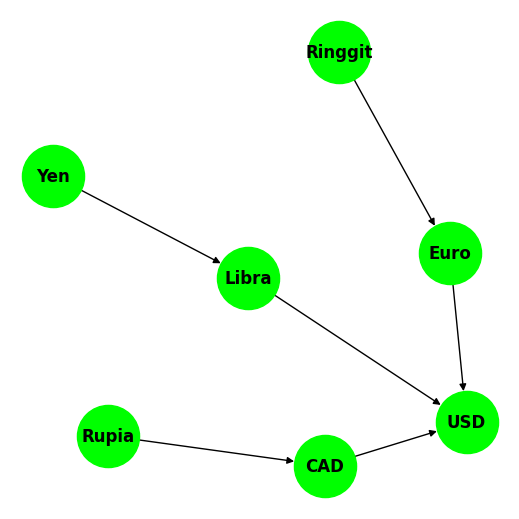

In [163]:
plt.figure(figsize=(10, 8))

transacciones2 = [
    ('Yen', 'Libra'), ('Rupia', 'CAD'), ('Ringgit', 'Euro'),
    ('CAD', 'USD'),   ('Euro', 'USD'),  ('Libra', 'USD')]

# Crear el grafo
D2 = nx.DiGraph()

D2.add_edges_from(transacciones2)

plt.figure(figsize=(5, 5))


nx.draw(D2, with_labels=True, node_size=2000, node_color='lime',
        arrows=True, font_size=12, font_weight='bold')


Modificamos el impuesto de la 'Rupia' a 500%
<p><font color="pink"> nuevoimp = {i: {j: (costs[i][j] * 6 if i == 'Rupia' else costs[i][j]) for j in currencies} for i in currencies} </p>


Creamos una funcion en este caso, (caso3 para que sea mas facil llamarla)
<p><font color="skyblue"> Creamos la red con Networkx </p>

<p><font color="coffe"> llamamos a la funcion para crear la red G3</p>

In [ ]:
# (d) Nuevo impuesto en Indonesia: +500% a COSTOS cuando la moneda de ORIGEN es 'Rupia'
#     Red SIN LÍMITES (OMC), resolver y mostrar plan óptimo

# 1) Costos ajustados (incremento de 500% => multiplicar por 6)
nuevoimp = {i: {j: (costs[i][j] * 6 if i == 'Rupia' else costs[i][j]) for j in currencies} for i in currencies}

# 2) Red sin límites usando los costos ajustados
def casod(impuestosnuevos):
    G = nx.DiGraph()
    for currency in currencies:
        G.add_node(currency, supply=initial_holdings_dict[currency])
    cap = 1e12
    for i in currencies:
        for j in currencies:
            if i == j:
                continue
            net_rate = rates[i][j] * (1 - impuestosnuevos[i][j])
            G.add_edge(i, j,
                       rate=rates[i][j],
                       cost_rate=impuestosnuevos[i][j],
                       net_rate=net_rate,
                       capacity=cap,
                       cost_percent=impuestosnuevos[i][j] * 100)
    return G

G3 = casod(nuevoimp)

Para ver la informacion de la red y ver si se realizo el cambio
<p><font color="skyblue"> llamamos a la funcion info_network(): </p>

In [ ]:
info_network(G3)

Yen -> Rupia: Tasa=50.0000, Costo=0.5%, Límite=1,000,000,000,000
Yen -> Ringgit: Tasa=0.0400, Costo=0.5%, Límite=1,000,000,000,000
Yen -> USD: Tasa=0.0080, Costo=0.4%, Límite=1,000,000,000,000
Yen -> CAD: Tasa=0.0100, Costo=0.4%, Límite=1,000,000,000,000
Yen -> Euro: Tasa=0.0064, Costo=0.4%, Límite=1,000,000,000,000
Yen -> Libra: Tasa=0.0048, Costo=0.25%, Límite=1,000,000,000,000
Yen -> Peso: Tasa=0.0768, Costo=0.5%, Límite=1,000,000,000,000
Rupia -> Yen: Tasa=0.0200, Costo=3.0%, Límite=1,000,000,000,000
Rupia -> Ringgit: Tasa=0.0008, Costo=4.199999999999999%, Límite=1,000,000,000,000
Rupia -> USD: Tasa=0.0002, Costo=3.0%, Límite=1,000,000,000,000
Rupia -> CAD: Tasa=0.0002, Costo=1.8000000000000003%, Límite=1,000,000,000,000
Rupia -> Euro: Tasa=0.0001, Costo=1.8000000000000003%, Límite=1,000,000,000,000
Rupia -> Libra: Tasa=0.0001, Costo=4.5%, Límite=1,000,000,000,000
Rupia -> Peso: Tasa=0.0015, Costo=4.5%, Límite=1,000,000,000,000
Ringgit -> Yen: Tasa=25.0000, Costo=0.5%, Límite=1,000

Resolvemos el problema con la nueva red G3
<p><font color="skyblue"> Creamos el modelo con pl.LpMaximize</p>

Resolvemos con model.solve()

<p><font color="lime"> Imprimimos la cantidad de cambio</p>
<p><font color="lavanda"> Y la lista de transaciones</p>

In [ ]:
# 3) Modelo y solución
model = pl.LpProblem("Optimizacion_Red_Divisas_Sin_Limites_Indonesia_Impuesto", pl.LpMaximize)
x = { (u, v): pl.LpVariable(f"x_{u}_{v}", lowBound=0, upBound=G[u][v]['capacity']) for u, v in G3.edges() }

final_usd = initial_holdings_dict['USD']
for u, v in G3.edges():
    if v == 'USD':
        final_usd += x[(u, v)] * G3[u][v]['net_rate']
    if u == 'USD':
        final_usd -= x[(u, v)]

model += final_usd

for k in currencies:
    if k != 'USD':
        inflow = pl.lpSum(x[(i, k)] * G3[i][k]['net_rate'] for i in G3.predecessors(k))
        outflow = pl.lpSum(x[(k, j)] for j in G3.successors(k))
        model += outflow <= initial_holdings_dict[k] + inflow

model.solve()
print(f"USD máximo obtenido (impuesto Indonesia +500%): ${pl.value(final_usd):,.2f}")

print("\nTransacciones óptimas (flujo > 1):")
for (u, v), var in x.items():
    val = pl.value(var)
    if val and val > 1:
        amount_to = val * G3[u][v]['net_rate']
        print(f"{u:8} -> {v:8}: {val:12,.0f} -> {amount_to:12,.0f}")

USD máximo obtenido (impuesto Indonesia +500%): $16,787,381.52

Transacciones óptimas (flujo > 1):
Yen      -> Libra   : 1,200,000,000 →    5,745,600
Rupia    -> CAD     : 10,500,000,000 →    2,062,200
Ringgit  -> Euro    :   28,000,000 →    4,462,080
CAD      -> USD     :    2,062,200 →    1,648,935
Euro     -> USD     :    4,462,080 →    5,572,022
Libra    -> USD     :    5,745,600 →    9,566,424


Finalmente imprimimos la lista de Transacciones como una red
<p><font color="skyblue"> Guardamos las transacciones realizadas en una lista transacciones3 = []</p>

Creamos un grafo dirigido nx.DiGrapg()
<p><font color="lightgreen"> añadimos los arcos de la lista transacciones D3.add_edges_from()</p>
<p><font color="lavanda"> usamos plt para un mejor diseño</p>
<p><font color="tomato"> nx.draw para dibujar la red de transacciones</p>

<Figure size 1000x800 with 0 Axes>

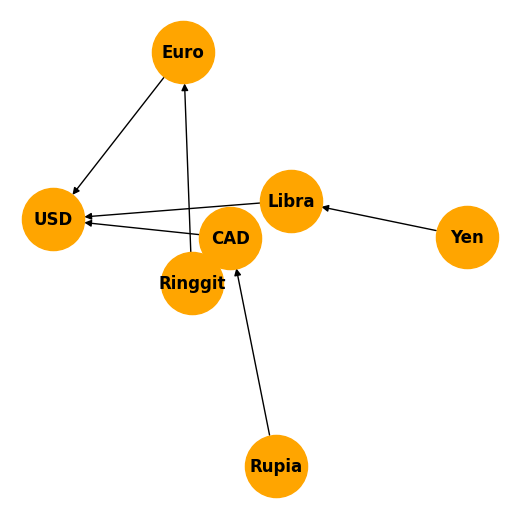

In [164]:
plt.figure(figsize=(10, 8))

transacciones3 = [
    ('Yen', 'Libra'), ('Rupia', 'CAD'), ('Ringgit', 'Euro'),
    ('CAD', 'USD'),   ('Euro', 'USD'),  ('Libra', 'USD')]

# Crear el grafo
D3 = nx.DiGraph()

D3.add_edges_from(transacciones3)

plt.figure(figsize=(5, 5))


nx.draw(D3, with_labels=True, node_size=2000, node_color='orange',
        arrows=True, font_size=12, font_weight='bold')

### (e) Otros factores que Jake debe considerar antes de decidir

1. **Riesgo cambiario futuro**  
   Posibles variaciones en las tasas de cambio en el corto y mediano plazo.  
   Escenarios de devaluación o apreciación de monedas clave.  

2. **Estabilidad macroeconómica**  
   Inflación, tasas de interés y deuda en Japón, Indonesia y Malasia.  
   Posibles intervenciones de bancos centrales.  

3. **Regulaciones financieras adicionales**  
   Controles de capital que puedan imponerse después.  
   Restricciones legales sobre repatriación de utilidades.  

4. **Riesgo político**  
   Inestabilidad política o tensiones regionales que afecten la liquidez.  

5. **Costos ocultos**  
   Impuestos adicionales, tarifas bancarias y tiempo de liquidación.  

6. **Diversificación**  
   Evaluar si conviene mover todo a USD o diversificar parte en CAD, Euro, Libra, etc.  

7. **Liquidez de mercado**  
   Volumen disponible para cambiar grandes montos sin afectar el tipo de cambio.  

8. **Impacto estratégico**  
   Efecto en la reputación y en la relación con socios financieros.  

**Conclusión:**  
Jake debe evaluar no sólo la maximización de dólares netos en el corto plazo,  
sino también el riesgo, las regulaciones y la sostenibilidad de su estrategia.